## Q1

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Credit Card Customer Data.csv")

In [ ]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
X = df.select_dtypes(include=['int64','float64'])

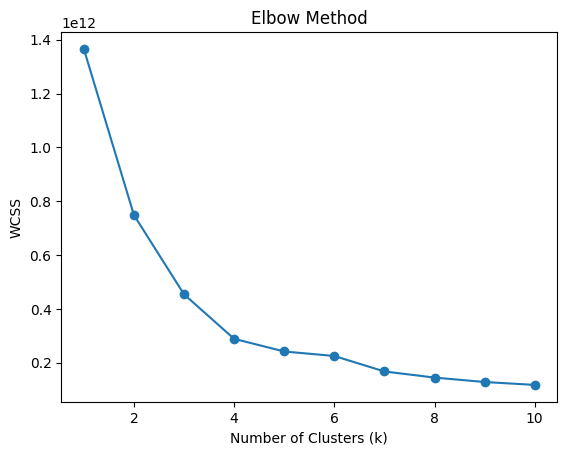

In [ ]:
wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [ ]:
print(df.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  Cluster  
0                  1                    1                 0        1  
1                  0                   10                 9        1  
2                  1                    3                 4        0  
3                  1                    1                 4        0  
4                  0                   12                 3        1  


## Q2

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Online Retail.xlsx")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']

In [ ]:
customer_df = df.groupby('CustomerID').agg({'Quantity': 'sum', 'TotalSpent': 'sum'}).reset_index()

In [ ]:
customer_df.rename(columns={'Quantity': 'TotalItems'}, inplace=True)

In [ ]:
features = customer_df[['TotalItems', 'TotalSpent']].values
features = (features - features.mean(axis=0)) / features.std(axis=0)


In [ ]:
wcss = []
for k in range(1, 11):
    if k == 1:
        inertia = np.sum((features - features.mean(axis=0))**2)
    else:
        centroids, distortion = kmeans(features, k, iter=50)
        labels, _ = vq(features, centroids)
        inertia = np.sum((features - centroids[labels])**2)
    wcss.append(inertia)

print('WCSS for Task 2:', wcss)

WCSS for Task 2: [np.float64(8678.0), np.float64(3128.1830270732), np.float64(1925.5036149826813), np.float64(2244.519950798465), np.float64(1066.6382345103461), np.float64(1404.813419658928), np.float64(1330.1948333998025), np.float64(918.11754185775), np.float64(907.2293409669736), np.float64(879.9138862029106)]


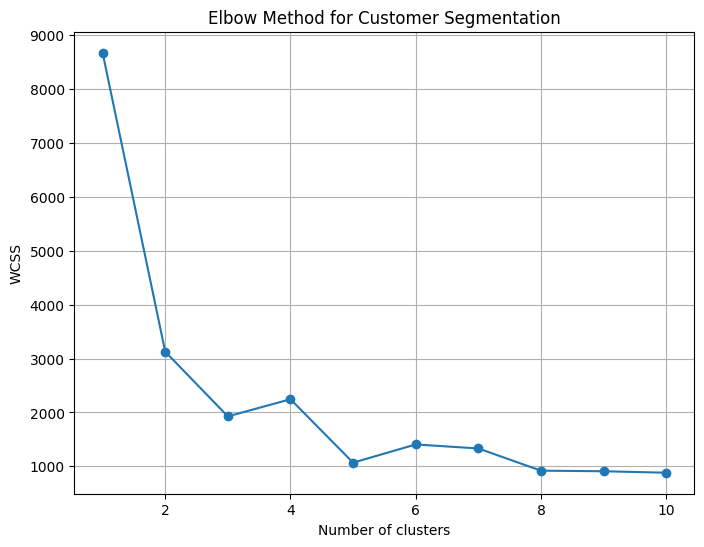

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Customer Segmentation')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)

In [ ]:
#k=3
centroids, distortion = kmeans(features, 3, iter=50)
labels, _ = vq(features, centroids)
customer_df['Cluster'] = labels

In [ ]:
print('Cluster means for Task 2:')
print(customer_df.groupby('Cluster')[['TotalItems', 'TotalSpent']].mean())
print('Cluster sizes for Task 2:')
print(customer_df['Cluster'].value_counts())

Cluster means for Task 2:
           TotalItems     TotalSpent
Cluster                             
0        61666.473684  107635.400000
1          472.413055     813.523328
2         4146.309701    7067.095205
Cluster sizes for Task 2:
Cluster
1    3784
2     536
0      19
Name: count, dtype: int64


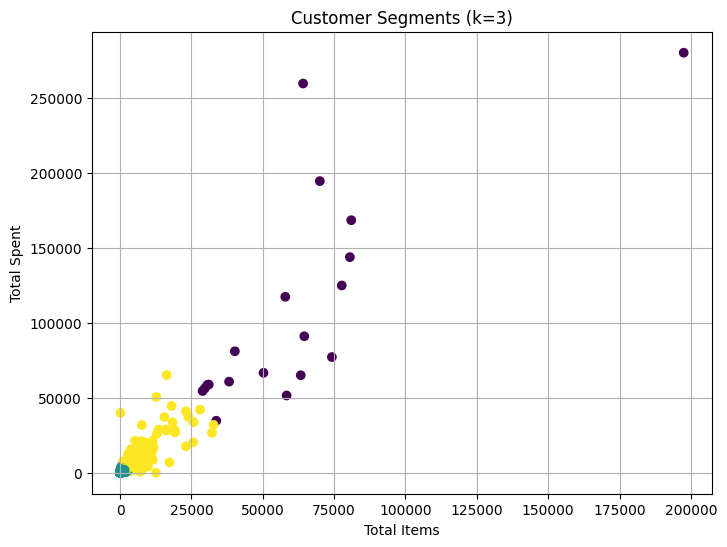

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(customer_df['TotalItems'], customer_df['TotalSpent'], c=customer_df['Cluster'], cmap='viridis')
plt.title('Customer Segments (k=3)')
plt.xlabel('Total Items')
plt.ylabel('Total Spent')
plt.grid(True)

Interpretation: Cluster 0 represents low-activity customers with low items and spend - target with promotions to increase engagement. Cluster 1 is regular customers with medium spend - offer loyalty programs to upsell. Cluster 2 is high-value bulk buyers - provide personalized VIP services and exclusive deals for retention. This segmentation aids targeted marketing strategies

## Q3